# Airline Dataset

## 1. Import Libraries

In [143]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
import warnings
from scipy.stats import shapiro
from scipy.stats import kstest
from scipy.stats import chisquare
from sklearn.linear_model import LinearRegression
warnings.filterwarnings('ignore')

## 2. Loading the data into the data frame.

In [144]:
#Read File from CSV file and saving it in airline_data DataFrame
df = pd.read_csv("airline_data.csv")
airline_data = df
# To display the top 5 rows
airline_data.head()

,Passanger_Name,Flying_month,Route,Rating,Verified,Review_title,Review_content,Traveller_type,Class
0,Paige Boet,Jun-23,New Orleans to London,1.0,Trip Verified,The airline lost my luggage,The airline lost my luggage and was absolutely...,Solo Leisure,Economy Class
1,S Layne,Mar-23,London to Amman,1.0,Trip Verified,fully refunded by our travel insurance,"We booked on the BA website, round trip flight...",Couple Leisure,Business Class
2,E Lanewoski,Heathrow to Bodrum,Business Class,2.0,Trip Verified,no boarding drinks provided,"First time flying with BA business class, neve...",A321 neo,Solo Leisure
3,Joel Burman,Jun-23,Amman to London,4.0,Not Verified,WiFi didn't work,You can buy sandwiches and crisps but don't ex...,Solo Leisure,Economy Class
4,R Vines,London City to Ibiza,Business Class,7.0,Trip Verified,stick with economy,This is a two-for-one review covering economy ...,Embraer 190,Family Leisure


In [145]:
#Perform Info/Describe to see the structure of the Datframe
airline_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3580 entries, 0 to 3579
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Passanger_Name  3580 non-null   object 
 1   Flying_month    2815 non-null   object 
 2   Route           2816 non-null   object 
 3   Rating          3575 non-null   float64
 4   Verified        1270 non-null   object 
 5   Review_title    3580 non-null   object 
 6   Review_content  3580 non-null   object 
 7   Traveller_type  3580 non-null   object 
 8   Class           3579 non-null   object 
dtypes: float64(1), object(8)
memory usage: 251.8+ KB


In [146]:
airline_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,3575.0,4.79049,3.170323,1.0,2.0,4.0,8.0,10.0


# 3. Cleaning Dataset

In [147]:
#Checkign the percentage of Null values betweeen the total of values per column
percentage_null = (airline_data.isnull().sum() / len(airline_data))*100
percentage_null

Passanger_Name     0.000000
Flying_month      21.368715
Route             21.340782
Rating             0.139665
Verified          64.525140
Review_title       0.000000
Review_content     0.000000
Traveller_type     0.000000
Class              0.027933
dtype: float64

In [148]:
#Drop "Verified" column as it has more than 60% of null values 
#Also, this information can not be found in other columns of the Dataset
airline_data.drop('Verified',axis=1, inplace = True)

## 3.1 Cleaning 'Class'

In [149]:
#Exploring the kind of Data in the Column 'Class'
airline_data.groupby('Class').count()

,Passanger_Name,Flying_month,Route,Rating,Review_title,Review_content,Traveller_type
Class,,,,,,,
Business,430,430,430,430,430,430,430
Business Class,183,183,183,183,183,183,183
Couple Leisure,641,641,641,641,641,641,641
Economy Class,676,675,676,676,676,676,676
Family Leisure,234,234,234,234,234,234,234
First Class,11,11,11,11,11,11,11
LHR to ORD,1,1,1,1,1,1,1
London to Malaga,1,1,1,1,1,1,1
Los Angeles to London to Paris to Rome,1,1,1,1,1,1,1


In [150]:
#Create New Column to modify as the column could have data usefull for others
airline_data['Class_fix'] = airline_data['Class']

In [151]:
#I found there are 'Class' data in the Column 'Root', I will filter it a copy
Route_to_fix = airline_data[(airline_data['Class'] != 'Premium Economy') & (airline_data['Class'] != 'Business Class') & (airline_data['Class'] != 'First Class') & (airline_data['Class'] != 'Economy Class')]['Route']

In [152]:
#Paste that Data found into the new Class Column (filtering by rows without relevant information for Class)
airline_data['Class_fix'][(airline_data['Class_fix'] != 'Premium Economy') & (airline_data['Class_fix'] != 'Business Class') & (airline_data['Class_fix'] != 'First Class_fix') & (airline_data['Class_fix'] != 'Economy Class')] = Route_to_fix

In [153]:
#Also, Traveller_type has CLass useful data, will do the same process
Traveller_to_fix = airline_data[(airline_data['Class_fix'] != 'Premium Economy') & (airline_data['Class_fix'] != 'Business Class') & (airline_data['Class_fix'] != 'First Class') & (airline_data['Class_fix'] != 'Economy Class')]['Traveller_type']

In [154]:
#Paste Data in the new Class Column (filtering by rows without relevant information for Class)
airline_data['Class_fix'][(airline_data['Class_fix'] != 'Premium Economy') & (airline_data['Class_fix'] != 'Business Class') & (airline_data['Class_fix'] != 'First Class') & (airline_data['Class_fix'] != 'Economy Class')] = Traveller_to_fix

In [155]:
#Last 13 Rows are first Class has a space and need to manually be modified
airline_data['Class_fix'][(airline_data['Class_fix'] != 'Premium Economy') & (airline_data['Class_fix'] != 'Business Class') & (airline_data['Class_fix'] != 'First Class') & (airline_data['Class_fix'] != 'Economy Class')] = 'First Class'

In [156]:
#Corrobarting all our values has now the correct information in our variable 'Class'
airline_data.groupby('Class_fix').count()

,Passanger_Name,Flying_month,Route,Rating,Review_title,Review_content,Traveller_type,Class
Class_fix,,,,,,,,
Business Class,1161,867,867,1160,1161,1161,1161,1161
Economy Class,1849,1521,1522,1846,1849,1849,1849,1849
First Class,212,156,156,211,212,212,212,211
Premium Economy,358,271,271,358,358,358,358,358


## 3.2 Cleaning 'Route'

In [157]:
airline_data['Route'].fillna('None')

0       New Orleans to London
1             London to Amman
2              Business Class
3             Amman to London
4              Business Class
                ...          
3575                     None
3576                     None
3577                     None
3578                     None
3579                     None
Name: Route, Length: 3580, dtype: object

In [158]:
#Create New Column to modify as the column could have data usefull for others
airline_data['Route_fix'] = airline_data['Route']

In [159]:
#Copy useful data from Route Column
Copy_flying = airline_data[(airline_data['Route_fix'] == 'Premium Economy') | (airline_data['Route_fix'] == 'Business Class') | (
                airline_data['Route_fix'] == 'First Class') | (airline_data['Route_fix'] == 'Economy Class')]['Flying_month']

In [160]:
#Paste Data in the new Class Column, filtering by rows without relevant information for Class
airline_data['Route_fix'][(airline_data['Route_fix'] == 'Premium Economy') | (airline_data['Route_fix'] == 'Business Class') | (
                airline_data['Route_fix'] == 'First Class') | (airline_data['Route_fix'] == 'Economy Class')] = Copy_flying

In [161]:
airline_data['Route_fix'][(~airline_data['Route_fix'].str.contains('|'.join(['to','London','LHR','Edinburgh']), na=False)) & (airline_data['Class'] != 'Premium Economy') & (airline_data['Class'] != 'Business Class') & (airline_data['Class'] != 'First Class') & (airline_data['Class'] != 'Economy Class') & (airline_data['Class'] != 'no') & (airline_data['Class'] != 'yes') & (airline_data['Class'] != 'Family Leisure') & (airline_data['Class'] != 'NaN')] = airline_data[(~airline_data['Route_fix'].str.contains('|'.join(['to','London','LHR','Edinburgh']), na=False)) & (airline_data['Class'] != 'Premium Economy') & (airline_data['Class'] != 'Business Class') & (airline_data['Class'] != 'First Class') & (airline_data['Class'] != 'Economy Class') & (airline_data['Class'] != 'no') & (airline_data['Class'] != 'yes') & (airline_data['Class'] != 'Family Leisure') & (airline_data['Class'] != 'NaN')]['Class']

In [162]:
airline_data[(~airline_data['Route_fix'].str.contains('|'.join(['to','London','LHR','Edinburgh']), na=False))]

,Passanger_Name,Flying_month,Route,Rating,Review_title,Review_content,Traveller_type,Class,Class_fix,Route_fix
42,Nicholas Felty,no,May-23,1.0,I had to reschedule my flight,I booked business class tickets for my fiancé ...,Couple Leisure,Business Class,Business Class,May-23
234,Paul Mayer,no,Jun-22,1.0,do not allow free seat selection,"Second time getting poor service from BA. 1st,...",Family Leisure,Business Class,Business Class,Jun-22
419,barbara ciereszko,no,Jul-21,1.0,no refund issued yet,"Booked flight six months before travel, then m...",Family Leisure,Economy Class,Economy Class,Jul-21
2552,Steve Purkis,no,Feb-15,1.0,Fawlty Towers of customer service,My issue is the very poor British Airways cust...,Family Leisure,Economy Class,Economy Class,Feb-15
2567,Travis Rodgers,no,Sep-15,5.0,seats were extremely small,The British Airways seats were extremely small...,Couple Leisure,Economy Class,Economy Class,Sep-15
...,...,...,...,...,...,...,...,...,...,...
3575,W Benson,NaN,NaN,4.0,British Airways customer review,LHR-HKG on Boeing 747 - 23/08/12. Much has bee...,Economy Class,no,Economy Class,NaN
3576,S Luqman,NaN,NaN,4.0,British Airways customer review,Just got back from Bridgetown Barbados flying ...,Economy Class,no,Economy Class,NaN
3577,D Smith,NaN,NaN,4.0,British Airways customer review,LHR-JFK-LAX-LHR. Check in was ok apart from be...,Economy Class,no,Economy Class,NaN
3578,W Benson,NaN,NaN,6.0,British Airways customer review,HKG-LHR in New Club World on Boeing 777-300 - ...,Business Class,yes,Business Class,NaN


In [163]:
route_in_review = ['Heathrow to Tokyo','HER-LGW','Heathrow to San Francisco','Heathrow to Athens','Tampa from Gatwick','Punta Cana - Gatwick','LHR-PEK','EWR to LHR','LGW-PUJ-LGW','Bangkok to London Heathrow','ZRH-LHR','LHR-ATL-LHR','JNB-LHR','LGW-HER','Gatwick to Florida','Gatwick-Naples','Tampa - Gatwick','LGW-CUN-LGW','LGW-RAK-LGW','BLQ-LGW','YYZ-LHR-BRU','LGW-AGP','Madrid-London','LHR to Istanbul','BRU-LHR-YYZ','LAX-LHR-LAX','LHR to CPT','CPT-LHR-MAD','MAN-LHR-YYZ','BRU-LHR-LAX','LGW-MCO-LGW','LHR-EZE','Pisa-LGW','Heathrow to Istanbul','London to Seattle','Manchester to JFK','Gatwick to Barbados','IST-LHR','LCY-ZHR','SAT-DFW-LHR-BRU','LGW-Pisa','LHR-MAD','LHR-SYD-MAD','LHR-SFO-LHR','Heathrow to Bilbao','NCL-LHR','Gatwick to Kingston','Hong Kong to London','LHR-Sidney','LHR-GVA','Sydney-LHR','LHR-BKK','LHR-AMS-LHR','LHR-PHL','LHR to SYD','LHR to Tokyo','Heathrow to Bologna','DEL-LHR','Heathrow to Rome','Delhi to Heathrow','Seattle USA - Heathrow','LGW to LAS','LHR-FRA','MAN-LHR-ATL','MIA-LHR','Bangkok from London','LHR-YVR','LHR Philadelphia','Shanghai to London','Warsaw to Heathrow','LGW-JER-LGW','VIE-LHR','LHR-IAD-LHR','LHR-PHL','DEL-LHR-HAM','GRU-LHR','GVA-LGW-GVA','London to Budapest','LHR-PISA-LHR','LGW-TFS-LGW','Warsaw to Heathrow','LHR-YVR','LGW-JER-LGW','London Heathrow to Dubai','VIE-LHR','LHR-IAD-LHR','LHR-DEL','BRU-EWR','LHR-SIN','LHR-PHL','LHR-LAX','YYZ-DXB','LHR to Frankfurt','LHR to YVR','LHR-Washington','SFO to Milan','IAD-LHR-IAS','Johannesburg to London','Heathrow to Boston','Heathrow to Boston','Heathrow to Washington','LHR-CDG','LAX-LHR','LHR-JFK','Sydney to Singapore','LHR-Zurich','JHB to LHR','LHR-Zurich','LHR-HGK','LHR-MIA','MIA-LHR','MAD-LHR','LGW-ACF','DEN-LHR','NCL-LHR','BKK-LHR','LHR-SIN','DUB-LCY','CPT-JNB','LGW to MCO','SFO-LHR','LGW-MLA','LGW-CUN','LGW-Barcelona','LHR-HKG','Miami to Brussels','LHR to Denver Colorado','MAD-SCL','Manchester to LHR','Los Angeles - Heathrow','LIS-LHR','LGW to TFS','LHR-Prague','HAM-LHR','SAN-MUC','Austin to London','LHR-SFO','London-Prague','TPA - LGW','VIE-LHR','LHR to LAX','Phoenix to London','LHR to IST','LHR-HEL','BGI-LGW','LHR to Seattle','IAH-LHR','YVR-LHR','LHR-BGO','LCA-LHR','London Coty to Florence','NBO-LHR','AMS-LHR','LHR to DXB','MCT to LHR','LHR-ZHR','Kingston to London','LHR-JNB','LGW to Cancun','LGW-ACE','BRU-Toronto','LGW to TFS','LHR to PHX','LHR to Las Vegas','Gatwick to Marrakech','Toronto to London','GIG-LHR','LHR-DEL','IAD-LHR','London to Calgary','OSL-LHR','LGW to Catania','Lucia to London','Aberdeen-Heathrow','LGW to CMB','LHR-MXP','LHR-NCL','LGW to SZG','VIE to LHR','Singapore-London','LHR-FCO','Rome to London Gatwick','LHR-Hannover Germany','LGW to Alicante','Gatwick-Colombia','LHR-NCL','BHD-LHR','LHR-SIS','LHR-SIN','LHR-BUD','Madrid-London','LHR-EWR','LHR-BOS','LHR - IST','LHR-MCT','Rome to LHR','London to Doha','LHR to Muscat','LHR-YYZ','Bari to Gatwick','DXB-LHR','LGW-TFS','LHR-HKK','LHR - Houston','Heathrow to Newark','Porto-LHR','LHR-CPH','LHR-CDG','DUS-LHR','Edinburgh-Gatwick','LHR-BSL','DME-LHR','ZRH to SFO','LAX to ZHR','GOT-LHR','LHR-FRA','LHR to Mumbai','Paris - London','Montreal - LHR','LGW to AMS','LHR-ATH','LHR to BKK','Dublin to Sydney','MCT-LHR','Heathrow - Johannesburg','Gatwick-Venice']

In [164]:
airline_data[(~airline_data['Route_fix'].str.contains('|'.join(['to','London','LHR','Edinburgh']), na=False)) & (airline_data['Review_content'].str.contains('|'.join(route_in_review), na=False))]

,Passanger_Name,Flying_month,Route,Rating,Review_title,Review_content,Traveller_type,Class,Class_fix,Route_fix
2820,R Vines,NaN,NaN,3.0,British Airways customer review,I flew from Heathrow to Tokyo Haneda in First....,First Class,yes,First Class,NaN
2821,David Ellis,NaN,NaN,2.0,British Airways customer review,HER-LGW. Our return flight confirmed our view ...,Business Class,no,Business Class,NaN
2824,D Evans,NaN,NaN,4.0,British Airways customer review,Flew from Heathrow to San Francisco on May 1st...,Premium Economy,no,Premium Economy,NaN
2825,Sean Kyte,NaN,NaN,7.0,British Airways customer review,Flew Eurotraveller Heathrow to Athens and back...,Economy Class,yes,Economy Class,NaN
2826,Peter Gordon,NaN,NaN,8.0,British Airways customer review,LHR-YYZ in World Traveller Plus (upgrade) in a...,Premium Economy,yes,Premium Economy,NaN
...,...,...,...,...,...,...,...,...,...,...
3563,C Thomas,NaN,NaN,6.0,British Airways customer review,I'm not normally one to whine but here goes. L...,Economy Class,yes,Economy Class,NaN
3570,D Nolan,NaN,NaN,5.0,British Airways customer review,Flew return in CW from LHR to BKK in August 20...,Business Class,yes,Business Class,NaN
3573,Bruce Bettridge,NaN,NaN,4.0,British Airways customer review,Business LHR to BKK. 747-400. First try back w...,Business Class,no,Business Class,NaN
3575,W Benson,NaN,NaN,4.0,British Airways customer review,LHR-HKG on Boeing 747 - 23/08/12. Much has bee...,Economy Class,no,Economy Class,NaN


In [165]:
review_to_extract = airline_data[(~airline_data['Route_fix'].str.contains('|'.join(['to','London','LHR','Edinburgh']), na=False))]['Review_content']

In [166]:
review_to_extract = review_to_extract.str.split().apply(set(route_in_review).intersection)
review_to_extract

42             {}
234            {}
419            {}
2552           {}
2567           {}
          ...    
3575    {LHR-HKG}
3576           {}
3577           {}
3578           {}
3579           {}
Name: Review_content, Length: 771, dtype: object

In [167]:
airline_data['Route_fix'][(~airline_data['Route_fix'].str.contains('|'.join(['to','London','LHR','Edinburgh']), na=False))] = review_to_extract

In [168]:
type(review_to_extract)

pandas.core.series.Series

## 3.3 Cleaning: Traveller Type

In [169]:
airline_data['Traveller_fix'] = airline_data['Traveller_type']

In [170]:
airline_data['Traveller_fix'][(~airline_data['Traveller_type'].str.contains('|'.join(['Solo Leisure','Family Leisure','Business','Couple Leisure']), na=False))] = airline_data[(~airline_data['Traveller_type'].str.contains('|'.join(['Solo Leisure','Family Leisure','Business','Couple Leisure']), na=False))]['Class']

In [171]:
airline_data[(~airline_data['Traveller_fix'].str.contains('|'.join(['Solo Leisure','Family Leisure','Business','Couple Leisure']), na=False))]['Traveller_fix'] = 'Other'

In [172]:
airline_data['Traveller_fix'][(~airline_data['Traveller_fix'].str.contains('|'.join(['Solo Leisure','Family Leisure','Business','Couple Leisure']), na=False))] = 'Other'
airline_data['Traveller_fix'][airline_data['Traveller_fix'] == 'Business Class'] = 'Other'
airline_data['Traveller_fix'][airline_data['Traveller_fix'].isnull() == True] = 'Other'

## 3.4 Cleaning: Flying Month

In [173]:
airline_data['Flying_month'][(~airline_data['Flying_month'].str.contains('|'.join(['-23','-22','21','20','19','18','17']), na=False))] = 'None'
airline_data['Flying_month'][airline_data['Flying_month'].isnull() == True] = 'None'

In [174]:
# Create a new Column - Extracting the month
airline_data['Month'] = airline_data['Flying_month'][(airline_data['Flying_month'].str.contains('|'.join(['-23','-22','21','20','19','18','17']), na=False))].str[0:3]

In [175]:
#Change
airline_data['Month'] = airline_data['Month'].replace('Jan','1-Jan')
airline_data['Month'] = airline_data['Month'].replace('Feb','2-Feb')
airline_data['Month'] = airline_data['Month'].replace('Mar','3-Mar')
airline_data['Month'] = airline_data['Month'].replace('Apr','4-Apr')
airline_data['Month'] = airline_data['Month'].replace('May','5-May')
airline_data['Month'] = airline_data['Month'].replace('Jun','6-Jun')
airline_data['Month'] = airline_data['Month'].replace('Jul','7-Jul')
airline_data['Month'] = airline_data['Month'].replace('Aug','8-Aug')
airline_data['Month'] = airline_data['Month'].replace('Sep','9-Sep')
airline_data['Month'] = airline_data['Month'].replace('Oct','10-Oct')
airline_data['Month'] = airline_data['Month'].replace('Nov','11-Nov')
airline_data['Month'] = airline_data['Month'].replace('Dec','12-Dec')

In [176]:
subset_airline = airline_data[(airline_data['Flying_month'].str.contains('|'.join(['-23','-22','21','20','19','18','17']), na=False))]

In [178]:
airline_data.groupby('Month').count()

,Passanger_Name,Flying_month,Route,Rating,Review_title,Review_content,Traveller_type,Class,Class_fix,Route_fix,Traveller_fix
Month,,,,,,,,,,,
1-Jan,52,52,52,52,52,52,52,52,52,52,52
10-Oct,45,45,45,45,45,45,45,45,45,45,45
11-Nov,50,50,50,50,50,50,50,50,50,50,50
12-Dec,48,48,48,48,48,48,48,48,48,48,48
2-Feb,50,50,50,50,50,50,50,50,50,50,50
3-Mar,87,87,87,87,87,87,87,87,87,87,87
4-Apr,67,67,67,67,67,67,67,67,67,67,67
5-May,65,65,65,65,65,65,65,65,65,65,65
6-Jun,70,70,70,70,70,70,70,70,70,70,70


## 3.5 Renaming and dropping unnecessary columns

In [179]:
airline_data = airline_data.drop(columns=['Traveller_type','Class','Route'],axis=1)
airline_data = airline_data[['Passanger_Name','Flying_month','Route_fix','Rating','Review_title','Review_content','Traveller_fix','Class_fix']]
airline_data.rename(columns={'Route_fix':'Route','Traveller_fix':'Traveller_type','Class_fix':'Class'}, inplace = True)

In [180]:
percentage_null = (airline_data.isnull().sum() / len(airline_data))*100
percentage_null

Passanger_Name    0.000000
Flying_month      0.000000
Route             0.000000
Rating            0.139665
Review_title      0.000000
Review_content    0.000000
Traveller_type    0.000000
Class             0.000000
dtype: float64

In [181]:
# Fill Na Values 
null_rating = airline_data[airline_data['Rating'].isnull()==True]
unique_class = null_rating['Class'].unique()
unique_class

array(['Economy Class', 'First Class', 'Business Class'], dtype=object)

In [182]:
for i in unique_class:
    airline_data['Rating'] = airline_data['Rating'].fillna(round(airline_data[airline_data['Class'] == i]['Rating'].mean(), 0))

In [183]:
percentage_null = (airline_data.isnull().sum() / len(airline_data))*100
percentage_null

Passanger_Name    0.0
Flying_month      0.0
Route             0.0
Rating            0.0
Review_title      0.0
Review_content    0.0
Traveller_type    0.0
Class             0.0
dtype: float64

# 4. Statistical Test

### Normality Test

In [184]:
#Perform Shapiro test to check the normality of the distribution 
from scipy.stats import shapiro
stat, p = shapiro(airline_data['Rating'])
print('stat={0:.3f}, p={0:.3f}' .format(stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat=0.886, p=0.886
Probably not Gaussian


<Axes: title={'center': 'Class'}, ylabel='Frequency'>

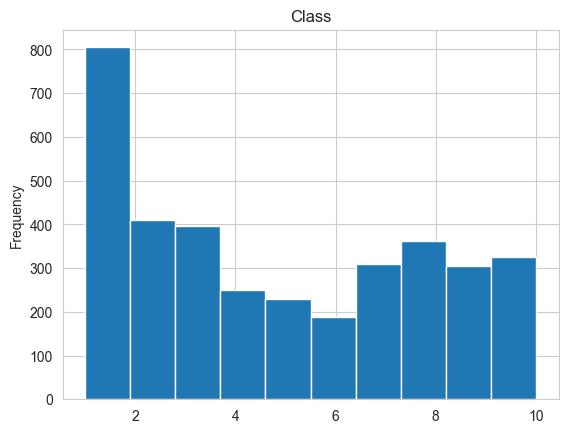

In [185]:
##Create a Histogram
airline_data['Rating'].plot(kind = 'hist', title = 'Class')
#From de Grpah we could be a Normal distribution data

### Encoding

In [186]:
from sklearn.preprocessing import LabelEncoder

airline_data_encoded = airline_data[['Flying_month','Rating','Traveller_type','Class']]

enc = LabelEncoder()
airline_data_encoded['Traveller_type'] = enc.fit_transform(airline_data_encoded['Traveller_type'])
airline_data_encoded['Class'] = enc.fit_transform(airline_data_encoded['Class'])
airline_data_encoded['Flying_month'] = enc.fit_transform(airline_data_encoded['Flying_month'])

# 4. Research Questions

## 4.1 •	Are the First-class Customers more dissatisfied? 
o	Null Hypothesis: There is no significance difference in the average rating based on Class of ticket
o	Alternative Hypothesis: There is significance difference in the average rating based on Class of ticket.

In [187]:
## T-Test (Numerical vs Categorical) <= 2 Groups
from scipy.stats import ttest_ind
data1 = airline_data_encoded['Rating']
data2 = airline_data_encoded['Class']
stat, p = ttest_ind(data1, data2)
print('stat={0:.3f}, p={0:.3f}'.format(stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

stat=70.121, p=70.121
Probably different distributions


<Axes: xlabel='Class', ylabel='Rating'>

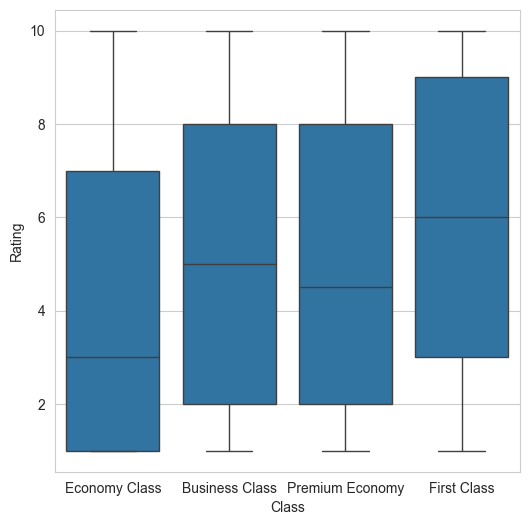

In [188]:
plt.figure(figsize=(6,6))
sns.boxplot(x=airline_data['Class'],y=airline_data['Rating'])

## 4.2 •	Are the customers travelling in winter less satisfied?
o	Null Hypothesis: There is no relationship between rating and Flying Month
o	Alternative Hypothesis: There is relationship between rating and Flying Month


## Not significant information to answer the question

[Text(0, 0, 'Jun-23'),
 Text(1, 0, 'Mar-23'),
 Text(2, 0, 'Apr-23'),
 Text(3, 0, 'May-23'),
 Text(4, 0, 'Feb-23'),
 Text(5, 0, 'Sep-22'),
 Text(6, 0, 'Jan-23'),
 Text(7, 0, 'May-22'),
 Text(8, 0, 'Dec-22'),
 Text(9, 0, 'Apr-22'),
 Text(10, 0, 'Oct-22'),
 Text(11, 0, 'Nov-22'),
 Text(12, 0, 'Aug-22'),
 Text(13, 0, 'Jul-22'),
 Text(14, 0, 'Jun-22'),
 Text(15, 0, 'Nov-21'),
 Text(16, 0, 'Jul-21'),
 Text(17, 0, 'Feb-22'),
 Text(18, 0, 'Mar-22'),
 Text(19, 0, 'Oct-21'),
 Text(20, 0, 'Jan-22'),
 Text(21, 0, 'Dec-21'),
 Text(22, 0, 'Aug-21'),
 Text(23, 0, 'Jan-21'),
 Text(24, 0, 'Sep-21'),
 Text(25, 0, 'Nov-20'),
 Text(26, 0, 'Oct-20'),
 Text(27, 0, 'Apr-21'),
 Text(28, 0, 'Jun-21'),
 Text(29, 0, 'Dec-20'),
 Text(30, 0, 'Feb-21'),
 Text(31, 0, 'Sep-20'),
 Text(32, 0, 'Nov-19'),
 Text(33, 0, 'Mar-20'),
 Text(34, 0, 'Jul-20'),
 Text(35, 0, 'Apr-20'),
 Text(36, 0, 'Feb-20'),
 Text(37, 0, 'May-20'),
 Text(38, 0, 'Jun-20'),
 Text(39, 0, 'Dec-19'),
 Text(40, 0, 'Aug-19'),
 Text(41, 0, 'Oct-19'),
 T

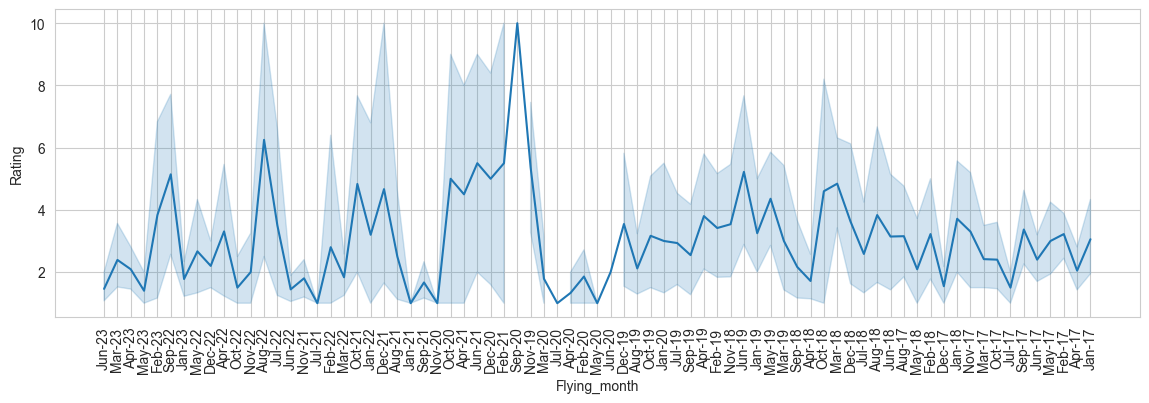

In [197]:
plt.figure(figsize=(14,4))
my_plot = sns.lineplot(x=subset_airline['Flying_month'],y=subset_airline['Rating'])
my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=90)

In [204]:
subset_airline = subset_airline.sort_values(by='Month')

[Text(0, 0, '1-Jan'),
 Text(1, 0, '10-Oct'),
 Text(2, 0, '11-Nov'),
 Text(3, 0, '12-Dec'),
 Text(4, 0, '2-Feb'),
 Text(5, 0, '3-Mar'),
 Text(6, 0, '4-Apr'),
 Text(7, 0, '5-May'),
 Text(8, 0, '6-Jun'),
 Text(9, 0, '7-Jul'),
 Text(10, 0, '8-Aug'),
 Text(11, 0, '9-Sep')]

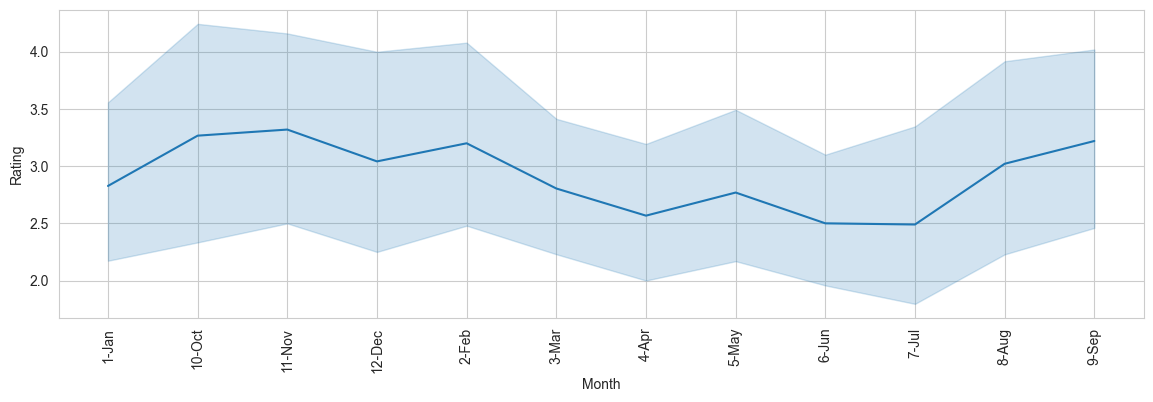

In [205]:
plt.figure(figsize=(14,4))
my_plot = sns.lineplot(x=subset_airline['Month'],y=subset_airline['Rating'],sort=True)
my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation
=90)

## 4.3 •	The family travellers are more dissatisfied.
o	Null Hypothesis: There is no significance difference in the average rating based on Type of traveller.
o	Alternative Hypothesis: There is significance difference in the average rating based on Type of traveller.


In [206]:
## T-Test (Numerical vs Categorical) <= 2 Groups
from scipy.stats import ttest_ind
data1 = airline_data_encoded['Rating']
data2 = airline_data_encoded['Traveller_type']
stat, p = ttest_ind(data1, data2)
print('stat={0:.3f}, p={0:.3f}'.format(stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

stat=46.452, p=46.452
Probably different distributions


[Text(0, 0, 'Solo Leisure'),
 Text(1, 0, 'Couple Leisure'),
 Text(2, 0, 'Family Leisure'),
 Text(3, 0, 'Business'),
 Text(4, 0, 'Other')]

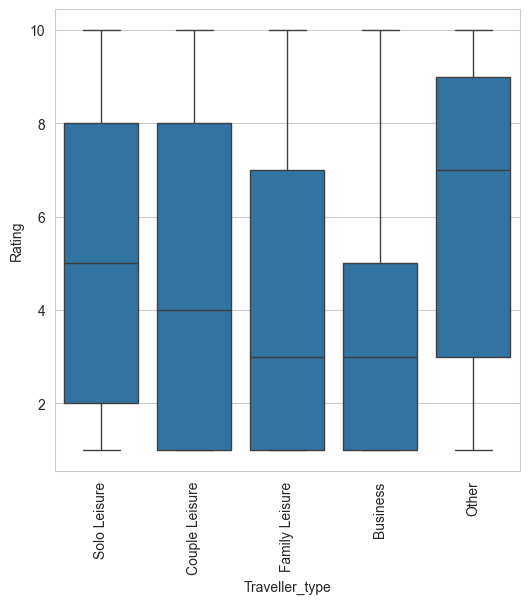

In [207]:
plt.figure(figsize=(6,6))
my_plot = sns.boxplot(x=airline_data['Traveller_type'],y=airline_data['Rating'])
my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=90)

In [208]:
airline_data.groupby('Traveller_type').count()

,Passanger_Name,Flying_month,Route,Rating,Review_title,Review_content,Class
Traveller_type,,,,,,,
Business,623,623,623,623,623,623,623
Couple Leisure,949,949,949,949,949,949,949
Family Leisure,382,382,382,382,382,382,382
Other,766,766,766,766,766,766,766
Solo Leisure,860,860,860,860,860,860,860


## 4.4 The Solo Traveller customers flying in First Class are more satisfied in Average?
o	Null Hypothesis: There is no significance difference in the average rating based on Type of traveller and Flying Month.
o	Alternative Hypothesis: There is significance difference in the average rating based on Type of traveller and Flying Month.



[Text(0, 0, 'Solo Leisure'),
 Text(1, 0, 'Couple Leisure'),
 Text(2, 0, 'Family Leisure'),
 Text(3, 0, 'Business'),
 Text(4, 0, 'Other')]

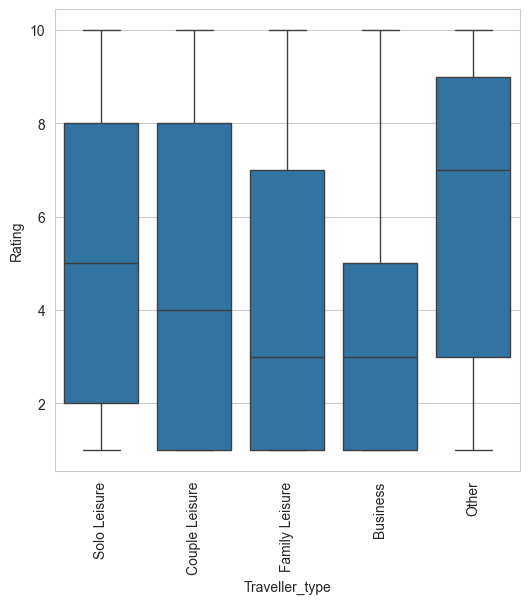

In [209]:
plt.figure(figsize=(6,6))
my_plot = sns.boxplot(x=airline_data['Traveller_type'],y=airline_data['Rating'])
my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=90)